# CREDIT RISK ANALYSIS


In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("E:/project")

In [53]:
## Pandas
## Numpy
## SKlearn
## Matplotlib

In [2]:
train=pd.read_csv("E:/project/train.csv")
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

FileNotFoundError: [Errno 2] No such file or directory: 'E:/project/train.csv'

In [55]:
train.head()


,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,BP001002,Male,No,Graduate,No,0,6666,0.0,228.0,260.0,0.0,Rural,0
1,CL001003,Male,Yes,Graduate,No,1,9946,2000.0,328.0,380.0,0.0,Rural,0
2,GP001005,Male,Yes,Graduate,Yes,0,2100,0.0,565.0,120.0,0.0,Urban,1
3,QP001006,Male,Yes,Not Graduate,No,0,3562,4652.0,323.0,4500.0,0.0,Urban,1
4,PP001008,Male,No,Graduate,No,0,4111,0.0,241.0,550.0,1.0,Urban,1


## Check the missing Values in data

In [56]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,593.000000,600.000000,564.000000,614.000000
mean,5410.576547,1624.154593,148.576728,348.268333,0.835106,0.685668
std,6112.140180,2927.535469,88.222775,182.533103,0.371414,0.464628
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,172.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,4500.000000,1.000000,1.000000


In [57]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [58]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('E:/project/test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\3363797783.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,BP001002,Male,No,Graduate,No,0,6666,0.0,228.0,260.0,0.0,Rural
1,CL001003,Male,Yes,Graduate,No,1,9946,2000.0,328.0,380.0,0.0,Rural
2,GP001005,Male,Yes,Graduate,Yes,0,2100,0.0,565.0,120.0,0.0,Urban
3,QP001006,Male,Yes,Not Graduate,No,0,3562,4652.0,323.0,4500.0,0.0,Urban
4,PP001008,Male,No,Graduate,No,0,4111,0.0,241.0,550.0,1.0,Urban


In [59]:
data.shape

(974, 12)

In [60]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,974.000000,974.000000,948.000000,954.000000,897.000000
mean,5193.138604,1620.556386,146.325949,347.177149,0.828317
std,5715.848056,2735.217584,85.418680,151.031164,0.377315
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2873.500000,0.000000,100.000000,360.000000,1.000000
50%,3804.000000,1125.500000,128.000000,360.000000,1.000000
75%,5526.500000,2369.250000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,747.000000,4500.000000,1.000000


In [61]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Education             0
Self_Employed        53
Dependents           25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term     20
Credit_History       77
Property_Area         0
dtype: int64

In [62]:
data.Dependents.dtypes

dtype('O')

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\3385944636.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

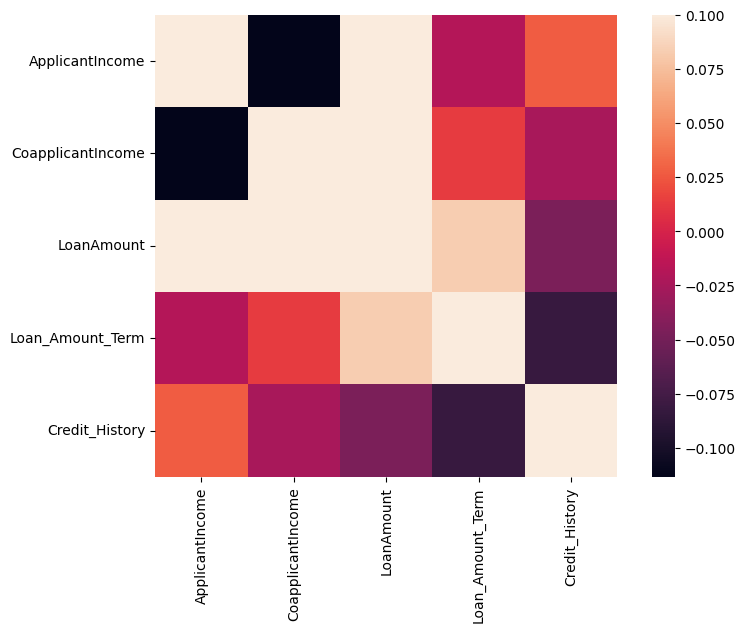

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corrmat,vmax=.10,square=True)

## Label ENcode

In [64]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    769
0.0    181
Name: Gender, dtype: int64

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\2477085234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

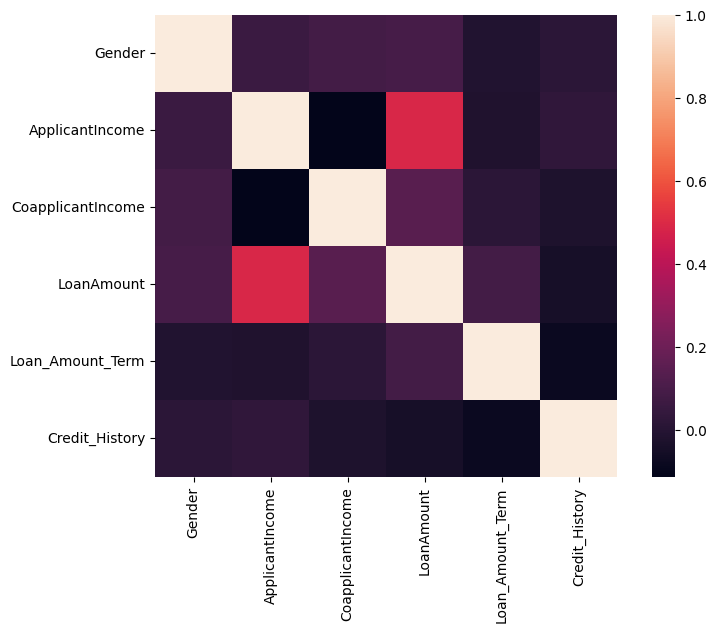

In [65]:
## Let's see correlations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corrmat,vmax=1,square=True)

In [66]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [67]:
data.Married.value_counts()

1.0    628
0.0    343
Name: Married, dtype: int64

In [68]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [69]:
data.Dependents.value_counts()

0.0    544
1.0    158
2.0    157
3.0     90
Name: Dependents, dtype: int64

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\1451296101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

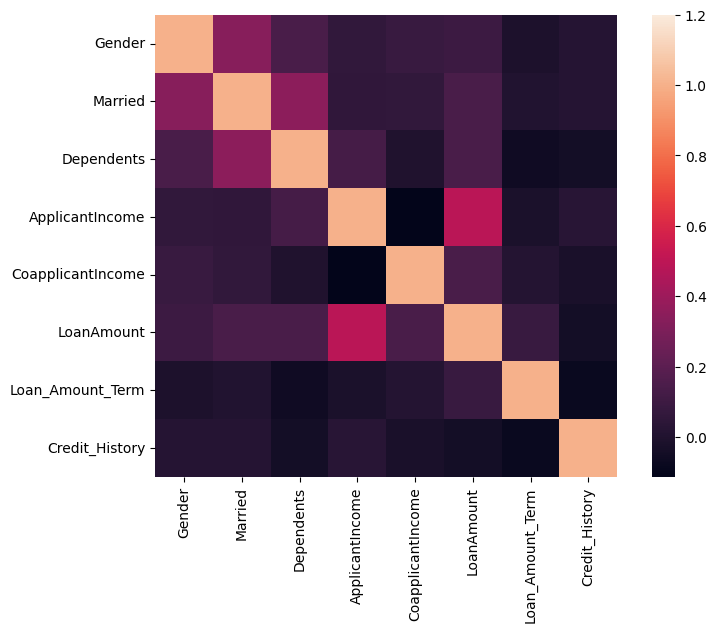

In [70]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corrmat,vmax=1.2,square=True)

In [71]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [72]:
data.Education.value_counts()

1    757
0    217
Name: Education, dtype: int64

In [73]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [74]:
data.Self_Employed.value_counts()

0.0    802
1.0    119
Name: Self_Employed, dtype: int64

In [75]:
data.Property_Area.value_counts()

Semiurban    346
Urban        337
Rural        291
Name: Property_Area, dtype: int64

In [76]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [77]:
data.Property_Area.value_counts()

1    346
2    337
0    291
Name: Property_Area, dtype: int64

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\3583819115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

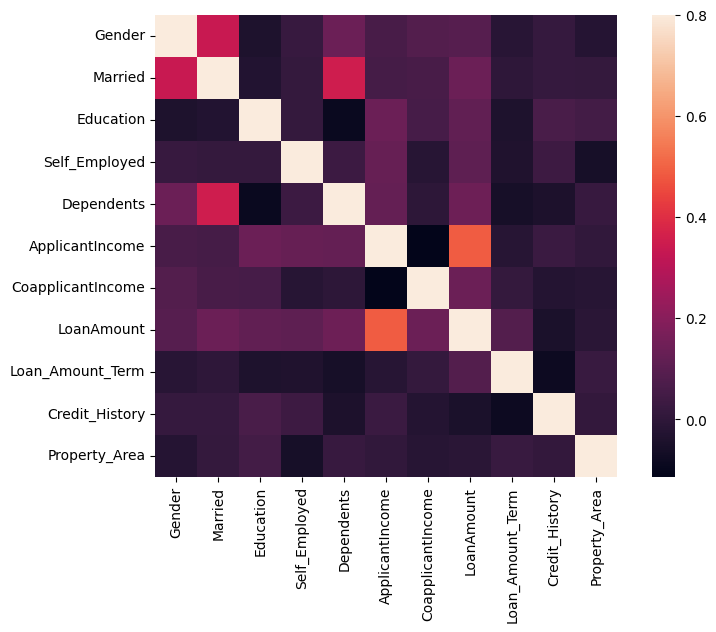

In [78]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corrmat,vmax=.8,square=True)

In [79]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,BP001002,1.0,0.0,1,0.0,0.0,6666,0.0,228.0,260.0,0.0,0
1,CL001003,1.0,1.0,1,0.0,1.0,9946,2000.0,328.0,380.0,0.0,0
2,GP001005,1.0,1.0,1,1.0,0.0,2100,0.0,565.0,120.0,0.0,2
3,QP001006,1.0,1.0,0,0.0,0.0,3562,4652.0,323.0,4500.0,0.0,2
4,PP001008,1.0,0.0,1,0.0,0.0,4111,0.0,241.0,550.0,1.0,2


In [80]:
data.Credit_History.size

974

## It's time to fill the missing values

In [81]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [82]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Education             0
Self_Employed        53
Dependents           25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [83]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [84]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Education             0
Self_Employed        53
Dependents           25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [85]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [86]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [87]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Education             0
Self_Employed        53
Dependents           25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [88]:
data.Gender.value_counts()

1.0    769
0.0    181
Name: Gender, dtype: int64

In [89]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [90]:
data.Gender.value_counts()

1.0    793
0.0    181
Name: Gender, dtype: int64

In [91]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [92]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed        53
Dependents            0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

C:\Users\Prakhar Saxena\AppData\Local\Temp\ipykernel_117120\448087104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

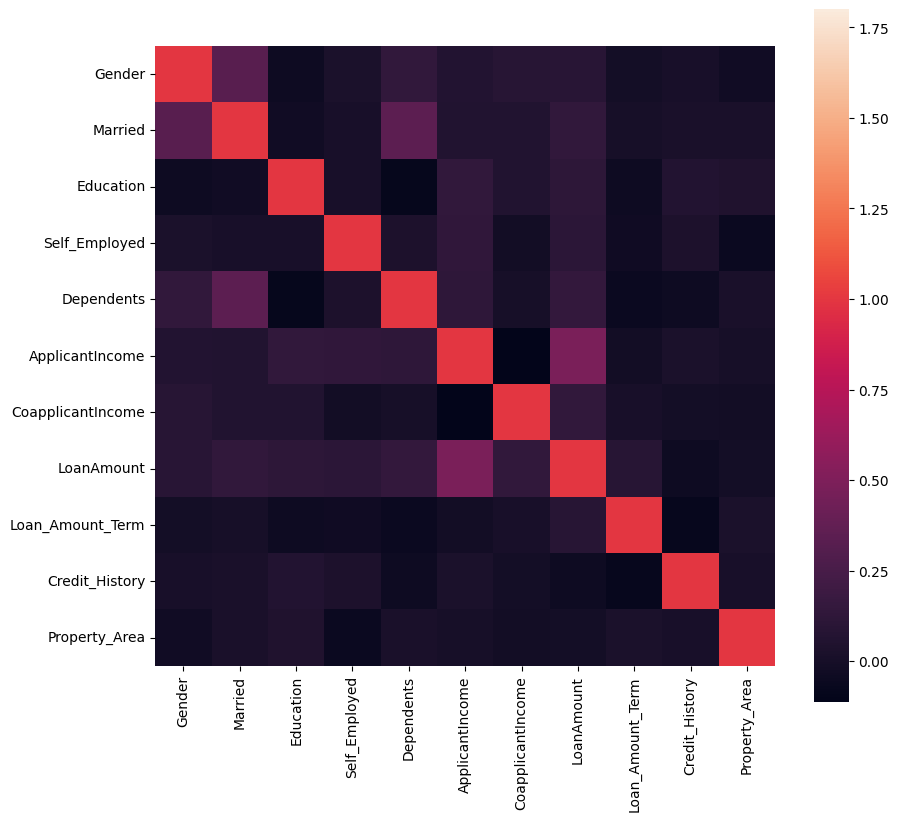

In [93]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(corrmat,vmax=1.8,square=True)

In [94]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [95]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [96]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,BP001002,1.0,0.0,1,0.0,0.0,6666,0.0,228.0,260.0,0.0,0
1,CL001003,1.0,1.0,1,0.0,1.0,9946,2000.0,328.0,380.0,0.0,0
2,GP001005,1.0,1.0,1,1.0,0.0,2100,0.0,565.0,120.0,0.0,2
3,QP001006,1.0,1.0,0,0.0,0.0,3562,4652.0,323.0,4500.0,0.0,2
4,PP001008,1.0,0.0,1,0.0,0.0,4111,0.0,241.0,550.0,1.0,2


In [97]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [98]:
data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [99]:
data.head()

,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,1,0.0,0.0,6666,0.0,228.0,260.0,0.0,0
1,1.0,1.0,1,0.0,1.0,9946,2000.0,328.0,380.0,0.0,0
2,1.0,1.0,1,1.0,0.0,2100,0.0,565.0,120.0,0.0,2
3,1.0,1.0,0,0.0,0.0,3562,4652.0,323.0,4500.0,0.0,2
4,1.0,0.0,1,0.0,0.0,4111,0.0,241.0,550.0,1.0,2


## Split the Data into X & Y

In [100]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [101]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [102]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1,0.0,1.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,1,0.0,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,1,0.0,2.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,1,0.0,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,1,0.0,0.0,1811,1666.0,54.0,360.0,1.0,2


In [103]:
# train_X.head()

In [104]:
test_X.head()

,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,1,1.0,0.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,1,0.0,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,1,0.0,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,1,0.0,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,1,0.0,2.0,2708,1167.0,97.0,360.0,1.0,1


##creation
 Machine Learning Model

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Fit the all ML Models

In [106]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [107]:
scoring='accuracy'

In [108]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [109]:
for name,model in models:
     kfold=KFold(n_splits=10,random_state=1,shuffle=True)
     cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
     result.append(cv_result)
     names.append(name)
     print(model) 
     print("%s %f" %(name,cv_result.mean()))

C:\Users\Prakhar Saxena\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prakhar Saxena\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

LogisticRegression()
Logistic Regression 0.793478
DecisionTreeClassifier()
Decision Tree 0.689130
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.797826
RandomForestClassifier()
Random Forest 0.782609
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.639130
GaussianNB()
Naive Bayes 0.776087


In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8441558441558441
[[ 21  22]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.49      0.64        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.74      0.77       154
weighted avg       0.85      0.84      0.83       154



C:\Users\Prakhar Saxena\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [112]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [113]:
X_test.head()

,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,1,0.0,0.0,8720,1.0,210.0,460.0,0.0,2
1,1.0,1.0,1,0.0,1.0,1222,2000.0,226.0,560.0,0.0,2
2,1.0,1.0,1,0.0,2.0,5020,1900.0,308.0,660.0,0.0,2
3,1.0,1.0,1,0.0,0.0,4444,3465.0,320.0,690.0,1.0,2
4,1.0,0.0,0,0.0,0.0,1111,0.0,747.0,360.0,1.0,2


In [114]:
prediction = LR.predict(X_test)

In [115]:
print(prediction)

[0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [116]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\Prakhar Saxena\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [117]:
print(t)

[1]


In [118]:
filename="model.pkl"

In [119]:
import pickle
with open(filename, 'wb') as f:
    pickle.dump(LR,f)
    

In [120]:
with open(filename, 'rb') as f:
    k = pickle.load(f)

  

In [121]:


cy = k.predict([[0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1]])
print(cy)

[1]


C:\Users\Prakhar Saxena\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
